Autor: Gustavo Vilela Mitraud <br>
Universidade Presbiteriana Mackenzie

In [1]:
import pandas as pd
import numpy as np

df_steam = pd.read_csv("archive/steam.csv")
df_steam.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

In [2]:
def getUniques(df):
    uniques = df
    
    for i in range(len(uniques)):
        uniques[i] = uniques[i].split(";")
    
    uniques = sum(uniques, [])

    return np.unique(uniques)

steamspy_tags = getUniques(df_steam["steamspy_tags"])
steamspy_tags

/tmp/ipykernel_2145/3502822475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniques[i] = uniques[i].split(";")
/tmp/ipykernel_2145/3502822475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniques[i] = uniques[i].split(";")
/tmp/ipykernel_2145/3502822475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniques[i] = uniques[i].split(";")
/tmp/ipykernel_2145/3502822475.py:5: SettingWithCopyWarning: 
A value is trying to be

array(['1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D',
       '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF',
       'Abstract', 'Action', 'Action RPG', 'Action-Adventure',
       'Adventure', 'Agriculture', 'Aliens', 'Alternate History',
       'America', 'Animation & Modeling', 'Anime', 'Arcade',
       'Arena Shooter', 'Assassin', 'Atmospheric', 'Audio Production',
       'BMX', 'Base-Building', 'Baseball', 'Basketball', 'Batman',
       'Battle Royale', "Beat 'em up", 'Beautiful', 'Benchmark', 'Bikes',
       'Blood', 'Board Game', 'Bowling', 'Building', 'Bullet Hell',
       'Bullet Time', 'CRPG', 'Capitalism', 'Card Game', 'Cartoon',
       'Cartoony', 'Casual', 'Cats', 'Character Action Game',
       'Character Customization', 'Chess', 'Choices Matter',
       'Choose Your Own Adventure', 'Cinematic', 'City Builder',
       'Class-Based', 'Classic', 'Clicker', 'Co-op', 'Cold War',
       'Colorful', 'Comedy', 'Comic Book', 'Competitive', 'Controll

Vamos agrupar todas as tags em categorias, para diminuir a grande dispersão dos dados

In [3]:
# A lista com a qual categoria cada tag pertence está no arquivo tags.txt

tags_file = open("tags.txt")
tags_lines = tags_file.readlines()

tags_lines = list(map(lambda x: x.rstrip(), tags_lines))
tags_lines

['Action:',
 '2D Fighter',
 'Action',
 'Action RPG',
 'Action Adventure',
 'Arena Shooter',
 'Battle Royale',
 "Beat 'em up",
 'Bullet hell',
 'Character Action Game',
 'FPS',
 'Fast-Paced',
 'Fighting',
 'Hack and Slash',
 'Heist',
 'MOBA',
 'Metroidvania',
 'On-Rails Shooter',
 'Parkour',
 'PvP',
 'Rogue-like',
 'Rogue-lite',
 "Shoot 'Em Up",
 'Shooter',
 'Sniper',
 'Souls-like',
 'Spectacle fighter',
 'Stealth',
 'Swordplay',
 'Third-Person Shooter',
 'Top-Down Shooter',
 'Twin Stick Shooter',
 '',
 'Role-Playing:',
 'Action RPG',
 'CRPG',
 'Choose Your Own Adventure',
 'Class-Based',
 'Crafting',
 'Dating Sim',
 'Grid-Based Movement',
 'JRPG',
 'MMORPG',
 'MOBA',
 'Metroidvania',
 'Mining',
 'Party-Based RPG',
 'RPG',
 'RPGMaker',
 'Rogue-like',
 'Rogue-lite',
 'Souls-like',
 'Strategy RPG',
 'Tactical RPG',
 'Turn-Based',
 'Turn-Based Combat',
 'Turn-Based Strategy',
 'Turn-Based Tatics',
 '',
 'Adventure:',
 '3D Platformer',
 'Action-Adventure',
 'Adventure',
 'Assassin',
 'Batma

In [4]:
tags_clusters_dict = dict()

cur_tag_cluster = ''

for index, line in enumerate(tags_lines):
    if line.endswith(":"):
        cur_tag_cluster = line
    
    elif cur_tag_cluster not in tags_clusters_dict:
        tags_clusters_dict[cur_tag_cluster] = []
    
    else:
        tags_clusters_dict[cur_tag_cluster].append(line)

tags_clusters_dict

{'Action:': ['Action',
  'Action RPG',
  'Action Adventure',
  'Arena Shooter',
  'Battle Royale',
  "Beat 'em up",
  'Bullet hell',
  'Character Action Game',
  'FPS',
  'Fast-Paced',
  'Fighting',
  'Hack and Slash',
  'Heist',
  'MOBA',
  'Metroidvania',
  'On-Rails Shooter',
  'Parkour',
  'PvP',
  'Rogue-like',
  'Rogue-lite',
  "Shoot 'Em Up",
  'Shooter',
  'Sniper',
  'Souls-like',
  'Spectacle fighter',
  'Stealth',
  'Swordplay',
  'Third-Person Shooter',
  'Top-Down Shooter',
  'Twin Stick Shooter',
  ''],
 'Role-Playing:': ['CRPG',
  'Choose Your Own Adventure',
  'Class-Based',
  'Crafting',
  'Dating Sim',
  'Grid-Based Movement',
  'JRPG',
  'MMORPG',
  'MOBA',
  'Metroidvania',
  'Mining',
  'Party-Based RPG',
  'RPG',
  'RPGMaker',
  'Rogue-like',
  'Rogue-lite',
  'Souls-like',
  'Strategy RPG',
  'Tactical RPG',
  'Turn-Based',
  'Turn-Based Combat',
  'Turn-Based Strategy',
  'Turn-Based Tatics',
  ''],
 'Adventure:': ['Action-Adventure',
  'Adventure',
  'Assassin'

In [5]:
recomendation_dict = {}

for i, game in enumerate(df_steam["steamspy_tags"]):
    if i not in recomendation_dict: recomendation_dict[i] = []

    for key in tags_clusters_dict.keys():
        if any(map(lambda v: v in game, tags_clusters_dict[key])):
            recomendation_dict[i].append(1)
        else: 
            recomendation_dict[i].append(0)
    

recomendation_df = pd.DataFrame(recomendation_dict).transpose()
recomendation_df


0  1  2  3  4  5  6  7  8
0      1  0  0  0  0  0  0  0  0
1      1  0  0  0  0  0  0  0  0
2      1  0  0  0  0  0  1  0  0
3      1  0  0  0  0  0  0  0  0
4      1  0  0  0  0  0  0  0  1
...   .. .. .. .. .. .. .. .. ..
27070  0  0  1  1  0  0  0  0  0
27071  1  0  1  0  0  0  0  0  0
27072  1  0  0  1  0  0  0  0  0
27073  0  0  1  1  0  0  0  0  0
27074  0  0  1  1  0  0  0  0  0

[27075 rows x 9 columns]

Calculando o numero ideal de cluster usando o metodo do cotovelo

In [6]:
from sklearn.cluster import KMeans

wcss = []

for cluster_num in range(2, 21):
    kmeans_test = KMeans(n_clusters=cluster_num)
    kmeans_test.fit(recomendation_df)
    wcss.append(kmeans_test.inertia_)

/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.loc

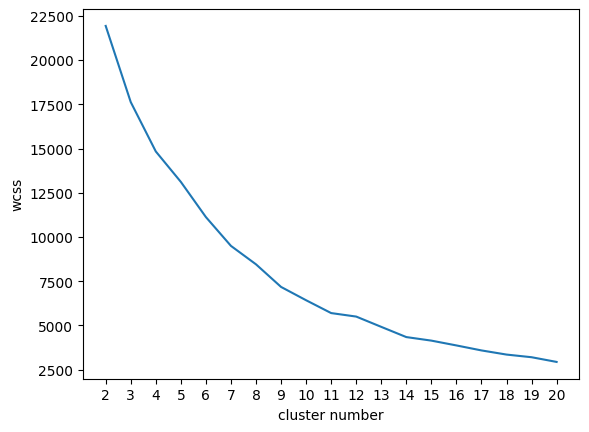

In [7]:
from matplotlib import pyplot as plt

plt.ylabel("wcss")
plt.xlabel("cluster number")
plt.xticks(range(2,21))
plt.plot(range(2,21), wcss)

aplicando o kmeans na base

In [12]:
clusters = KMeans(n_clusters=8).fit_predict(recomendation_df)
clusters

/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 7, 1, 1], dtype=int32)

In [13]:
lookup_recomendation = {"game_name": [x.lower() for x in df_steam["name"]], "cluster": clusters}

from sklearn.neighbors import NearestNeighbors
def get_games_incluster(game):
    cluster_to_recomend = int(lookup_recomendation.loc[lookup_recomendation["game_name"]==game]["cluster"])
    list_of_games = list(lookup_recomendation.loc[lookup_recomendation["cluster"]==cluster_to_recomend]["game_name"])
    return list_of_games

neighbours = NearestNeighbors(n_neighbors=5)
neighbours.fit(recomendation_df)

def get_recomendation_knn(game):
    index = df_steam.index[df_steam["name"]==game][0]
    neighbours_indexes = neighbours.kneighbors(np.array(recomendation_df.iloc[index]).reshape(1,-1))[1][0]
    return df_steam.iloc[neighbours_indexes]

get_recomendation_knn("Counter-Strike: Global Offensive")

appid                   name release_date  english developer publisher  \
1     20  Team Fortress Classic   1999-04-01        1     Valve     Valve   
6     70              Half-Life   1998-11-08        1     Valve     Valve   
3     40     Deathmatch Classic   2001-06-01        1     Valve     Valve   
0     10         Counter-Strike   2000-11-01        1     Valve     Valve   
5     60               Ricochet   2000-11-01        1     Valve     Valve   

           platforms  required_age  \
1  windows;mac;linux             0   
6  windows;mac;linux             0   
3  windows;mac;linux             0   
0  windows;mac;linux             0   
5  windows;mac;linux             0   

                                          categories  genres  \
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
6  Single-player;Multi-player;Online Multi-Player...  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
5  Multi-player;Online Multi-Player;Valve Anti-Ch...  Action   

                steamspy_tags  achievements  positive_ratings  \
1  [Action, FPS, Multiplayer]             0              3318   
6      [FPS, Classic, Action]             0             27755   
3  [Action, FPS, Multiplayer]             0              1273   
0  [Action, FPS, Multiplayer]             0            124534   
5  [Action, FPS, Multiplayer]             0              2758   

   negative_ratings  average_playtime  median_playtime             owners  \
1               633               277               62   5000000-10000000   
6              1100              1300               83   5000000-10000000   
3               267               258              184   5000000-10000000   
0              3339             17612              317  10000000-20000000   
5               684               175               10   5000000-10000000   

   price  
1   3.99  
6   7.19  
3   3.99  
0   7.19  
5   3.99